# TP1 Análisis de Datos

### Integrantes

* Juan Ignacio García (a2008)
* Rodrigo Mesa Marchi (a2016)
* Danilo Simón Reitano Andrades (a2020)
 
# Carga de datos y Análisis de características

El trabajo práctico que se presenta se centra en el análisis de usuarios del programa de Ecobicis de la Ciudad de Buenos Aires en 2024. De la página provista por la cátedra se extraen dos datasets que han sido renombrados para facilitar su análisis: `usuarios.csv` y `recorridos.csv`. Usando la librería `pandas` se forman dos dataframes leyendo los archivos de extensión .csv y se presentan los nombres de las características que contiene cada uno:

In [48]:
import pandas as pd

route_df = pd.read_csv(r".\recorridos-realizados-2024\badata_ecobici_recorridos_realizados_2024.csv")
user_df = pd.read_csv(r".\usuarios_ecobici_2024.csv")

print("Columnas del dataframe de recorridos:", route_df.columns)
route_df.head()

Columnas del dataframe de recorridos: Index(['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido',
       'id_estacion_origen', 'nombre_estacion_origen',
       'direccion_estacion_origen', 'long_estacion_origen',
       'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino',
       'nombre_estacion_destino', 'direccion_estacion_destino',
       'long_estacion_destino', 'lat_estacion_destino', 'id_usuario',
       'modelo_bicicleta', 'genero'],
      dtype='object')


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE
2,20429936,0,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE
3,20429976,0,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE


In [49]:
print("Columnas del dataframe de usuarios:", user_df.columns)
user_df.head()

Columnas del dataframe de usuarios: Index(['id_usuario', 'genero_usuario', 'edad_usuario', 'fecha_alta',
       'hora_alta'],
      dtype='object')


,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
0,1094487,OTHER,35,2024-01-18,09:21:02
1,1097128,FEMALE,21,2024-01-21,23:02:26
2,1102901,OTHER,19,2024-01-29,19:33:32
3,1096100,FEMALE,29,2024-01-20,18:57:05
4,1103049,MALE,21,2024-01-30,00:49:33


Se observa en el dataframe `route_df` información útil como el ID de quien realiza el recorrido, fechas y horas de inicio y fin de trayecto, lugares de partida y llegada entre otros campos de menor relevancia; y en el dataframe `user_df` información como el género y edad de los usuarios. Ambos dataframes pueden ser relacionados por la clave `id_usuario`, común en ambos dataframes.

Se muestra a continuación información más detallada sobre la cantidad de registros de cada dataframe, cuál es su tipo de dato de cada característica y qué cantidad de valores vacíos tiene. En variables numéricas se analiza cómo se distribuyen los valores de cada característica, mientras que en el caso de variables categóricas se indica qué cantidad de valores distintos posee cada una:

In [50]:
print("Registros en el dataframe de recorridos:", route_df.shape[0])

print("\nTipos de dato de cada columna del dataframe de recorridos:\n", route_df.dtypes, sep="")

print("\nCantidad de campos vacíos por columna:\n", route_df.isna().sum(), sep="")

cat_cols = route_df.select_dtypes(include=['object', 'category']).columns
print("\nCantidad de valores únicos por variable categórica:")
for col in cat_cols:
    print(f"{col}: {route_df[col].nunique()} valores únicos")

print("\nAnálisis de distribución de las variables numéricas")
route_df.describe()

Registros en el dataframe de recorridos: 3559284

Tipos de dato de cada columna del dataframe de recorridos:
id_recorrido                    int64
duracion_recorrido              int64
fecha_origen_recorrido         object
id_estacion_origen              int64
nombre_estacion_origen         object
direccion_estacion_origen      object
long_estacion_origen          float64
lat_estacion_origen           float64
fecha_destino_recorrido        object
id_estacion_destino             int64
nombre_estacion_destino        object
direccion_estacion_destino     object
long_estacion_destino         float64
lat_estacion_destino          float64
id_usuario                    float64
modelo_bicicleta               object
genero                         object
dtype: object

Cantidad de campos vacíos por columna:
id_recorrido                      0
duracion_recorrido                0
fecha_origen_recorrido            0
id_estacion_origen                0
nombre_estacion_origen            0
direccion_e

,id_recorrido,duracion_recorrido,id_estacion_origen,long_estacion_origen,lat_estacion_origen,id_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario
count,3.559284e+06,3.559284e+06,3.559284e+06,3.559284e+06,3.559284e+06,3.559284e+06,3.559284e+06,3.559284e+06,3.559284e+06
mean,2.234123e+07,1.274827e+03,2.356064e+02,-5.842301e+01,-3.459876e+01,2.371497e+02,-5.842318e+01,-3.459895e+01,7.908851e+05
std,1.257090e+06,9.584216e+03,1.657994e+02,3.828674e-02,2.440911e-02,1.657102e+02,3.846726e-02,2.476879e-02,3.882169e+05
min,2.018097e+07,0.000000e+00,2.000000e+00,-5.852710e+01,-3.468777e+01,2.000000e+00,-5.852710e+01,-3.468777e+01,2.400000e+01
25%,2.123850e+07,4.930000e+02,9.300000e+01,-5.844965e+01,-3.461635e+01,9.600000e+01,-5.844966e+01,-3.461649e+01,5.118240e+05
50%,2.235117e+07,8.810000e+02,1.990000e+02,-5.842095e+01,-3.460075e+01,2.000000e+02,-5.842095e+01,-3.460075e+01,9.133600e+05
75%,2.343694e+07,1.474000e+03,3.780000e+02,-5.839374e+01,-3.458255e+01,3.790000e+02,-5.839374e+01,-3.458234e+01,1.113537e+06
max,2.450328e+07,2.571165e+06,5.770000e+02,-5.835547e+01,-3.453669e+01,5.770000e+02,-5.835547e+01,-3.453669e+01,1.280599e+06


In [51]:
print("Registros en el dataframe de usuarios:", user_df.shape[0])

print("\nTipos de dato de cada columna del dataframe de usuarios:\n", user_df.dtypes, sep="")

print("\nCantidad de campos vacíos por columna:\n", user_df.isna().sum(), sep="")

cat_cols = user_df.select_dtypes(include=['object', 'category']).columns
print("\nCantidad de valores únicos por variable categórica:")
for col in cat_cols:
    print(f"{col}: {user_df[col].nunique()} valores únicos")

print("\nAnálisis de distribución de las variables numéricas")
user_df.describe()

Registros en el dataframe de usuarios: 197077

Tipos de dato de cada columna del dataframe de usuarios:
id_usuario         int64
genero_usuario    object
edad_usuario       int64
fecha_alta        object
hora_alta         object
dtype: object

Cantidad de campos vacíos por columna:
id_usuario        0
genero_usuario    0
edad_usuario      0
fecha_alta        0
hora_alta         0
dtype: int64

Cantidad de valores únicos por variable categórica:
genero_usuario: 3 valores únicos
fecha_alta: 366 valores únicos
hora_alta: 64102 valores únicos

Análisis de distribución de las variables numéricas


,id_usuario,edad_usuario
count,1.970770e+05,197077.000000
mean,1.182078e+06,30.764331
std,5.689309e+04,18.896127
min,1.083538e+06,4.000000
25%,1.132807e+06,21.000000
50%,1.182077e+06,27.000000
75%,1.231348e+06,37.000000
max,1.280619e+06,2021.000000


Basado en este análisis preliminar de los datos se observa:

* Que los datos de fechas de inicio y finalización de recorridos en `route_df` se estructuran en formato fecha-hora; y los de fecha y hora de registro en `user_df` se estructuran, respectivamente, como fecha y hora. Todos estos campos deben ser transformados a un formato `datetime` para poder trabajar con ellos más fácilmente.
* Que existen valores vacíos en el campo `fecha_destino_recorrido` de `route_df`.
* Que existen valores de duración 0 en el campo `duracion_recorrido` en `route_df`. Probablemente se trate de errores de registro de los datos y se deberá arreglar estos datos o eliminar estos registros.
* Que el campo `edad_usuario` en `user_df` posee datos anómalos, basados en el valor máximo que tiene la columna.

# Limpieza del dataset

Antes de visualizar las características detectadas como las más significativas y buscar patrones en los datos se trabaja sobre los puntos mencionados anteriormente para tener información de mejor calidad. Se comienza por la transformación de los datos en formato fecha y hora:

In [52]:
route_df['fecha_origen_recorrido'] = pd.to_datetime(route_df['fecha_origen_recorrido'])
route_df['fecha_destino_recorrido'] = pd.to_datetime(route_df['fecha_destino_recorrido'])
route_df['id_usuario'] = route_df['id_usuario'].astype(int)
user_df['fecha_alta'] = pd.to_datetime(user_df['fecha_alta'] +" "+ user_df['hora_alta'])
#user_df['hora_alta'] = pd.to_datetime(user_df['hora_alta'])
user_df.drop(columns="hora_alta", inplace=True)
print("\nTipos de dato de las columnas transformadas del dataframe de recorridos:\n", route_df[['fecha_origen_recorrido', 'fecha_destino_recorrido']].dtypes, sep="")
print("\nTipos de dato de las columnas transformadas del dataframe de usuarios:\n", user_df[['fecha_alta']].dtypes, sep="")


Tipos de dato de las columnas transformadas del dataframe de recorridos:
fecha_origen_recorrido     datetime64[ns]
fecha_destino_recorrido    datetime64[ns]
dtype: object

Tipos de dato de las columnas transformadas del dataframe de usuarios:
fecha_alta    datetime64[ns]
dtype: object


Para llenar los datos vacíos del campo `fecha_destino_recorrido` de `route_df` se suma la duración de los viajes, en segundos, al horario descrito en `fecha_origen_recorrido`, que no presenta datos vacíos. De este modo se obtiene:

In [54]:
# Locate empty values on fecha_destino_recorrido
mask = route_df['fecha_destino_recorrido'].isna()

# Replace empty values adding the route duration, in seconds, to fecha_origen_recorrido
route_df.loc[mask, 'fecha_destino_recorrido'] = (
    route_df.loc[mask, 'fecha_origen_recorrido'] +
    pd.to_timedelta(route_df.loc[mask, 'duracion_recorrido'], unit='s')
)

print("\nCantidad de campos vacíos tras la transformación:", route_df.fecha_destino_recorrido.isna().sum())


Cantidad de campos vacíos tras la transformación: 0


Por último, se trabaja en los valores en los que `duracion_recorrido` toma el valor 0. Cómo se muestra a continuación, esto representa el 1.06% de los casos, con lo cual se podrían simplemente desechar esos datos sin mayor repercusiones; pero aún así se intentarán recuperar como un ejercicio didáctico.

In [55]:
zero_duration_qtty = (route_df['duracion_recorrido'] == 0).sum()
print(f"Cantidad de registros con duración 0: {zero_duration_qtty}. Representan el {zero_duration_qtty/route_df.shape[0]*100}% de los registros")

Cantidad de registros con duración 0: 37618. Representan el 1.0568979603763005% de los registros



El primer método que se evalúa para la imputación de estos datos es llenarlos con la diferencia entre los tiempos de partida y llegada de cada viaje. Sin embargo, se observa que en todos los casos donde se cumple la restricción evaluada estos tiempos coinciden, denotando errores a la hora de cargar la información:

In [56]:
zero_duration_different_times_qtty = (
    (route_df['duracion_recorrido'] == 0) &
    (route_df['fecha_origen_recorrido'] != route_df['fecha_destino_recorrido'])
).sum()

print(f"Cantidad de registros con duración 0 y fechas distintas: {zero_duration_different_times_qtty}")

Cantidad de registros con duración 0 y fechas distintas: 0


De modo que el primer método de imputación queda invalidado. Como se observa que en estos casos aún si la fecha de origen y destino es la misma, las ubicaciones no lo son, de modo que el segundo método que se propone consiste en utilizar la [función de Haversine](https://es.wikipedia.org/wiki/F%C3%B3rmula_del_semiverseno) para estimar la distancia entre estaciones (considerando la curvatura de La Tierra, a diferencia de métodos eulerianos) aprovechando las coordenadas de latitud y longitud provistas por el dataframe. Luego, suponiendo una velocidad promedio de $12 km/h$ se obtiene una estimación del tiempo empleado en el trayecto: 

In [58]:
import numpy as np

# Función para calcular distancia con la fórmula de Haversine
def haversine(lat_origen, long_origen, lat_destino, long_destino):
    R = 6371  # Radio de la Tierra en km
    phi1 = np.radians(lat_origen)
    phi2 = np.radians(lat_destino)
    delta_phi = np.radians(lat_destino - lat_origen)
    delta_lambda = np.radians(long_destino - long_origen)
    a = np.sin(delta_phi / 2.0)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Crear una nueva columna con la distancia estimada
route_df['distancia_km'] = haversine(
    route_df['lat_estacion_origen'],
    route_df['long_estacion_origen'],
    route_df['lat_estacion_destino'],
    route_df['long_estacion_destino']
)

# Asumir una velocidad promedio, por ejemplo 12 km/h (bicicleta)
velocidad_kmh = 12
route_df['duracion_estim_seg'] = ((route_df['distancia_km'] / velocidad_kmh) * 3600).round().astype(int) # en segundos

zero_duration_qtty = ((route_df['duracion_recorrido'] == 0) & (route_df['duracion_estim_seg'] == 0)).sum()
print(f"Cantidad de registros con duración 0: {zero_duration_qtty}. Representan el {zero_duration_qtty/route_df.shape[0]*100}% de los registros")
route_df.loc[(route_df['duracion_recorrido'] == 0) & (route_df['duracion_estim_seg'] == 0)]

Cantidad de registros con duración 0: 6211. Representan el 0.1745013884815036% de los registros


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,distancia_km,duracion_estim_seg
416,20411915,0,2024-01-22 17:19:51,277,292 - PLAZA BOLIVIA,Olleros Av. & Del Libertador Av.,-58.436115,-34.563539,2024-01-22 17:19:51,277,292 - PLAZA BOLIVIA,Olleros Av. & Del Libertador Av.,-58.436115,-34.563539,1091629,FIT,OTHER,0.0,0
501,20405580,0,2024-01-22 08:15:48,8,008 - Congreso,"Cevallos, Virrey& Yrigoyen, Hipolito Av.",-58.389336,-34.609422,2024-01-22 08:15:48,8,008 - Congreso,"Cevallos, Virrey& Yrigoyen, Hipolito Av.",-58.389336,-34.609422,1077372,FIT,FEMALE,0.0,0
1438,23574911,0,2024-10-24 22:02:39,70,070 - ARAOZ,1413 Araoz & Gorriti CABA,-58.426060,-34.592686,2024-10-24 22:02:39,70,070 - ARAOZ,1413 Araoz & Gorriti CABA,-58.426060,-34.592686,1175323,FIT,MALE,0.0,0
1990,23568281,0,2024-10-24 10:11:25,508,170 - RAFAELA,Rafaela 4811,-58.494786,-34.639172,2024-10-24 10:11:25,508,170 - RAFAELA,Rafaela 4811,-58.494786,-34.639172,96713,FIT,MALE,0.0,0
2325,23563362,0,2024-10-23 21:26:25,519,053 - AV. DEL LIBERTADOR,Av. Del Libertador 100,-58.375443,-34.592915,2024-10-23 21:26:25,519,053 - AV. DEL LIBERTADOR,Av. Del Libertador 100,-58.375443,-34.592915,1054243,ICONIC,MALE,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3554247,21510424,0,2024-04-24 13:41:18,65,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2024-04-24 13:41:18,65,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,1146606,ICONIC,MALE,0.0,0
3554322,21509761,0,2024-04-24 13:07:43,504,214 - MORÓN,Morón 3089,-58.475180,-34.624720,2024-04-24 13:07:43,504,214 - MORÓN,Morón 3089,-58.475180,-34.624720,1129405,ICONIC,MALE,0.0,0
3554834,21506460,0,2024-04-24 08:26:32,5,005 - Plaza Italia,Av. Sarmiento 2601,-58.420954,-34.580550,2024-04-24 08:26:32,5,005 - Plaza Italia,Av. Sarmiento 2601,-58.420954,-34.580550,140779,FIT,MALE,0.0,0
3556963,21502496,0,2024-04-23 20:01:50,75,075 - Plaza Primero de Mayo,238 Pichincha,-58.398987,-34.612298,2024-04-23 20:01:50,75,075 - Plaza Primero de Mayo,238 Pichincha,-58.398987,-34.612298,889721,FIT,FEMALE,0.0,0


Se observa al final del proceso que todavía hay datos de duración 0 en los que el origen es igual al destino. Estos valores seguramente sí se traten de registros incorrectos y pueden ser eliminados sin perder información relevante. Habiendo hecho esta imputación, se observa que se reducen los datos eliminados de 37618 a 6211 (se salvan un 83,49% de los datos que se iban a desechar).

In [59]:
route_df = route_df.drop(route_df[(route_df['duracion_recorrido'] == 0) & (route_df['duracion_estim_seg'] == 0)].index)

print(route_df.loc[route_df['duracion_recorrido'] == 0, ['duracion_recorrido', 'duracion_estim_seg']])
route_df.loc[route_df['duracion_recorrido'] == 0, 'duracion_recorrido'] = route_df.loc[route_df['duracion_recorrido'] == 0, 'duracion_estim_seg']
route_df = route_df.drop(columns=['duracion_estim_seg'])

zero_duration_qtty = (route_df['duracion_recorrido'] == 0).sum()
print(f"Cantidad de registros con duración 0: {zero_duration_qtty}. Representan el {zero_duration_qtty/route_df.shape[0]*100}% de los registros")

         duracion_recorrido  duracion_estim_seg
2                         0                1051
3                         0                 955
20                        0                1226
41                        0                 473
53                        0                1881
...                     ...                 ...
3558644                   0                 198
3558693                   0                2357
3558885                   0                 349
3559165                   0                 180
3559231                   0                1922

[31407 rows x 2 columns]
Cantidad de registros con duración 0: 0. Representan el 0.0% de los registros


Ahora se trabajará con el campo `edad_usuario` del dataframe `user_df`. Para usar la aplicación de Ecobici es necesario verificar los datos mediante un escaneo del DNI, no es un dato que se pueda introducir manualmente. Por ello se determina que los datos incorrectos en la edad registrada que aparecen en el dataframe son valores incorrectos sin explicación aparente. 

Como posteriormente se realizará un análisis en función del grupo etario de los ciclistas, se imputarán los valores que superen los 80 años para que tomen este valor, de manera que cuando se evalúe el conjunto ">80 años" se incluyan los datos anómalos en este grupo. El porcentaje de los datos que serán imputados es del 0.11%:

In [ ]:
over_eighty_years = (user_df['edad_usuario'] > 80).sum()
print(f"Cantidad de usuarios sobre los 80 años: {over_eighty_years}. Representan el {over_eighty_years/user_df.shape[0]*100}% de los registros")

user_df['edad_usuario'] = user_df['edad_usuario'].clip(upper=80)

Cantidad de usuarios sobre los 80 años: 210. Representan el 0.1065573354577145% de los registros


# Visualización de patrones

Para las preguntas que se desea responder se necesitan las columnas `fecha_origen_recorrido`, `fecha_destino_recorrido`, `nombre_estacion_origen` y `nombre_estacion_destino` del dataframe `route_df`; y las columna `edad_usuario` del dataframe `user_df`. Para encontrar patrones en los datos se visualizará:

* La frecuencia de aparición para las fechas.
* Histogramas para las estaciones.
* Gráfico de caja y bigotes para la edad de los usuarios.
  
Esto permitirá tener una idea de cómo se distribuyen los datos en el dataframe y corregir anomalías en caso de que existan.

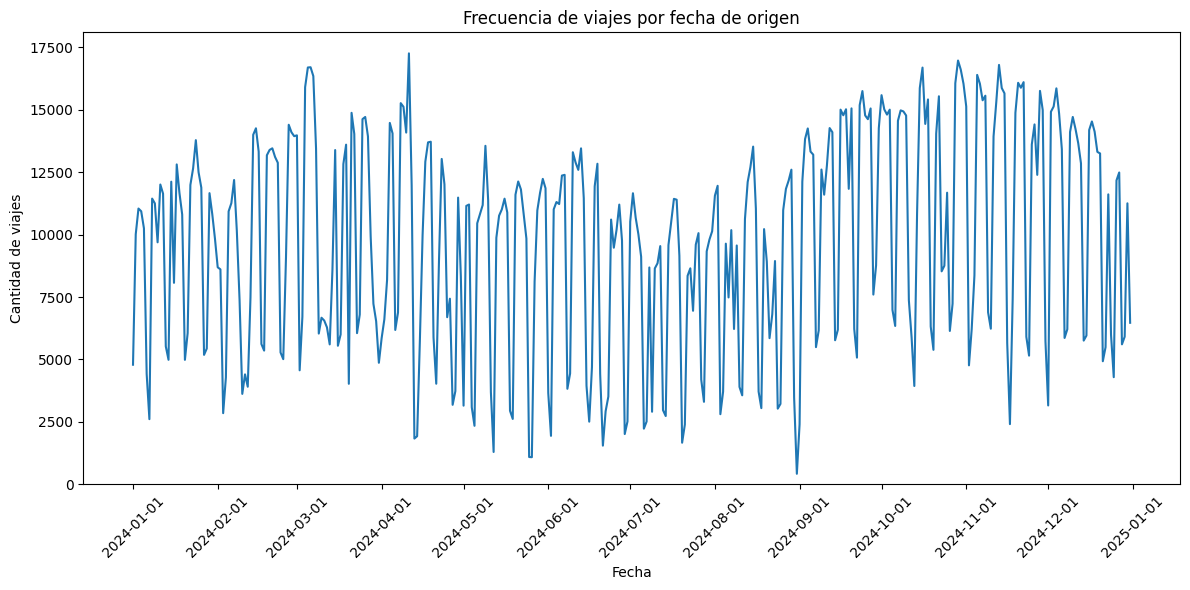

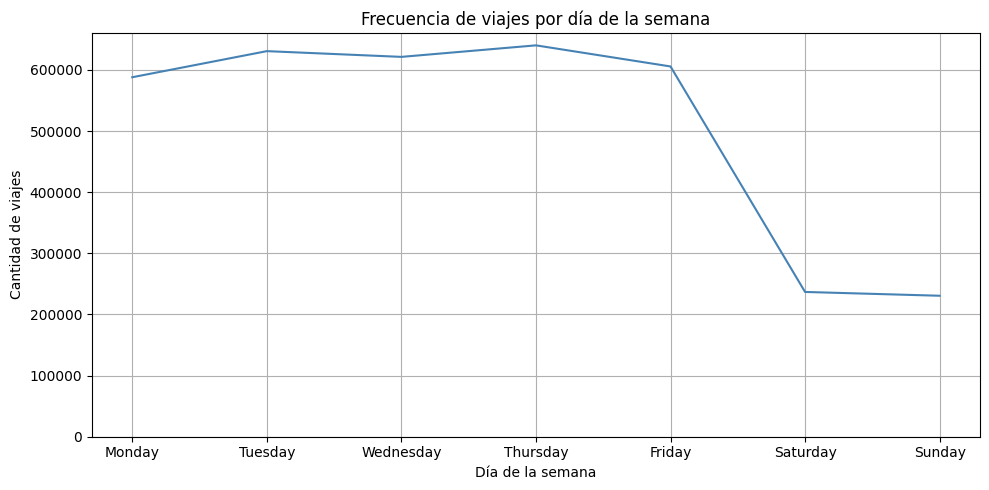

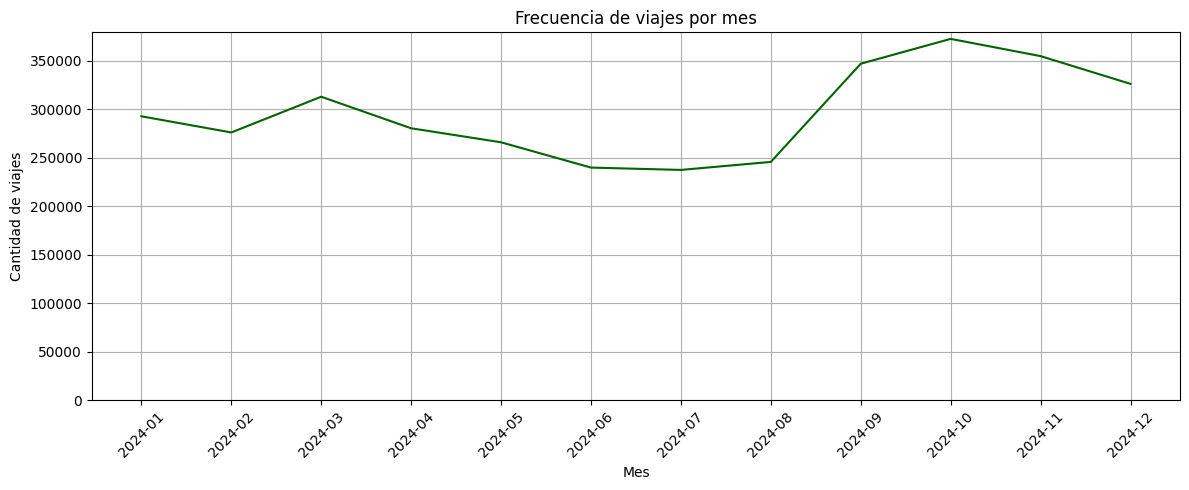

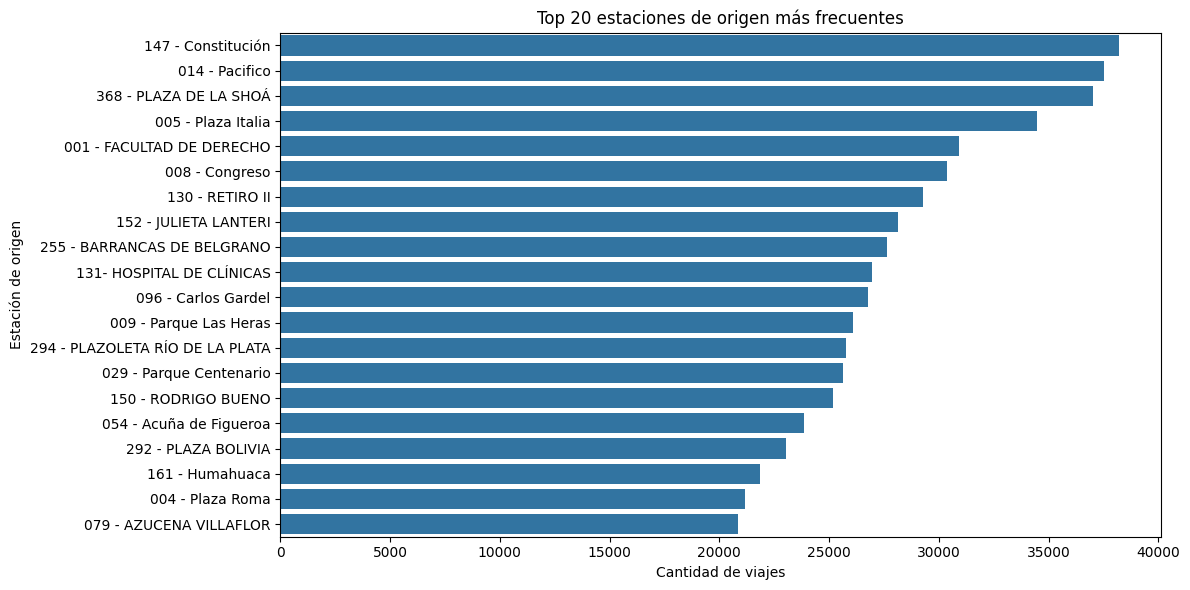

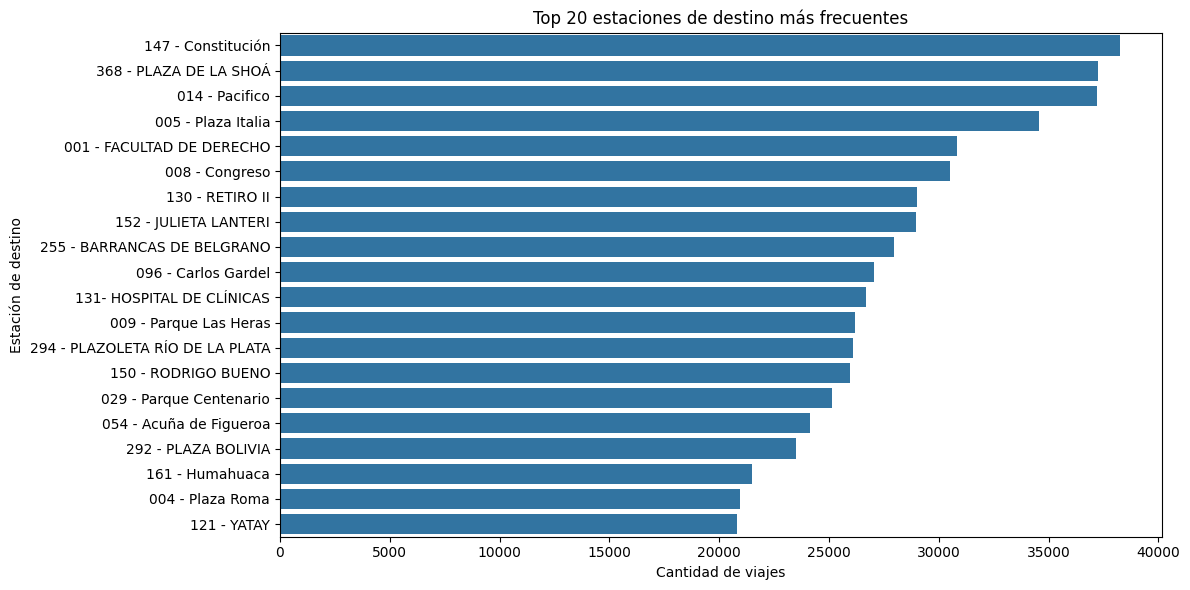

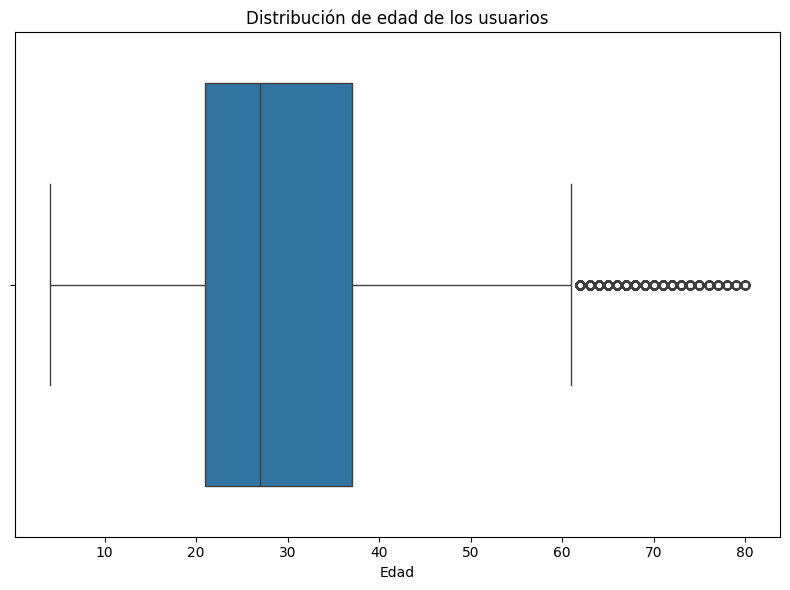

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Agrupar por fecha (por día) y contar
frecuencia_fechas = route_df['fecha_origen_recorrido'].dt.date.value_counts().sort_index()
frecuencia_fechas = frecuencia_fechas.sort_index()

# --- Gráfico de líneas con solo el primer día del mes en el eje X ---
plt.figure(figsize=(12, 6))
plt.plot(frecuencia_fechas.index, frecuencia_fechas.values, linestyle='-')
plt.title('Frecuencia de viajes por fecha de origen')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de viajes')
plt.ylim(bottom=0)
plt.xticks(rotation=45)

# Formatear eje X para mostrar solo el primer día de cada mes
locator = mdates.MonthLocator(bymonthday=1)
formatter = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Obtener nombre del día de la semana
route_df['dia_semana'] = route_df['fecha_origen_recorrido'].dt.day_name()

# Agrupar por día de la semana
frecuencia_dia_semana = route_df['dia_semana'].value_counts()
# Ordenar manualmente (los value_counts() no conservan el orden natural)
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
frecuencia_dia_semana = frecuencia_dia_semana.reindex(dias_ordenados)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(frecuencia_dia_semana.index, frecuencia_dia_semana.values, linestyle='-', color='steelblue')
plt.title('Frecuencia de viajes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de viajes')
plt.ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.show()

# Extraer año y mes
route_df['anio_mes'] = route_df['fecha_origen_recorrido'].dt.to_period('M')

# Agrupar por año-mes
frecuencia_por_mes = route_df['anio_mes'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12, 5))
plt.plot(frecuencia_por_mes.index.astype(str), frecuencia_por_mes.values, linestyle='-', color='darkgreen')
plt.title('Frecuencia de viajes por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de viajes')
plt.ylim(bottom=0)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Histogramas para las 20 estaciones de origen más frecuentes ---
top_origenes = route_df['nombre_estacion_origen'].value_counts().nlargest(20).index
plt.figure(figsize=(12, 6))
sns.countplot(data=route_df[route_df['nombre_estacion_origen'].isin(top_origenes)],
              y='nombre_estacion_origen',
              order=top_origenes)
plt.title('Top 20 estaciones de origen más frecuentes')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Estación de origen')
plt.tight_layout()
plt.show()

# --- Histogramas para las 20 estaciones de destino más frecuentes ---
top_destinos = route_df['nombre_estacion_destino'].value_counts().nlargest(20).index
plt.figure(figsize=(12, 6))
sns.countplot(data=route_df[route_df['nombre_estacion_destino'].isin(top_destinos)],
              y='nombre_estacion_destino',
              order=top_destinos)
plt.title('Top 20 estaciones de destino más frecuentes')
plt.xlabel('Cantidad de viajes')
plt.ylabel('Estación de destino')
plt.tight_layout()
plt.show()

# --- Gráfico de caja y bigotes para la edad ---
plt.figure(figsize=(8, 6))
sns.boxplot(x=user_df['edad_usuario'])
plt.title('Distribución de edad de los usuarios')
plt.xlabel('Edad')
plt.tight_layout()
plt.show()

In [61]:
user_df

,id_usuario,genero_usuario,edad_usuario,fecha_alta
0,1094487,OTHER,35,2024-01-18 09:21:02
1,1097128,FEMALE,21,2024-01-21 23:02:26
2,1102901,OTHER,19,2024-01-29 19:33:32
3,1096100,FEMALE,29,2024-01-20 18:57:05
4,1103049,MALE,21,2024-01-30 00:49:33
...,...,...,...,...
197072,1120417,FEMALE,45,2024-03-01 15:09:21
197073,1153589,MALE,55,2024-05-08 18:17:14
197074,1216661,MALE,25,2024-09-28 09:23:29
197075,1256657,MALE,24,2024-11-22 19:38:23


In [ ]:
route_df

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,distancia_km,dia_semana,anio_mes
0,20428222,568,2024-01-23 18:36:00,513,308 - SAN MARTIN II,Av. San Martín 5129,-58.490739,-34.597130,2024-01-23 18:45:28,498,055 - HABANA,Gral. José Gervasio Artigas 4298 (y Habana),-58.494959,-34.586598,992557.0,FIT,MALE,1.233165,Tuesday,2024-01
1,20431744,1355,2024-01-23 22:41:20,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,2024-01-23 23:03:55,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,320782.0,FIT,FEMALE,3.181816,Tuesday,2024-01
2,20429936,1051,2024-01-23 20:06:22,467,328 - SARMIENTO II,Sarmiento 2037,-58.395893,-34.605514,2024-01-23 20:06:22,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,828678.0,FIT,FEMALE,3.502486,Tuesday,2024-01
3,20429976,955,2024-01-23 20:08:17,382,204 - Biarritz,Biarritz 2403,-58.477255,-34.605431,2024-01-23 20:08:17,460,133 - BEIRO Y SEGUROLA,Segurola 3194,-58.511930,-34.607500,320782.0,ICONIC,FEMALE,3.181816,Tuesday,2024-01
4,20424802,680,2024-01-23 15:18:39,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-01-23 15:29:59,150,150 - RODRIGO BUENO,Av. España 2200,-58.355465,-34.618755,861425.0,FIT,FEMALE,1.155206,Tuesday,2024-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559279,21526830,506,2024-04-25 21:35:33,93,093 - CARLOS CALVO,Sarandi 1010,-58.394464,-34.620798,2024-04-25 21:43:59,175,147 - Constitución,Avenida Juan de Garay 1050,-58.380707,-34.626851,1124148.0,ICONIC,MALE,1.427400,Thursday,2024-04
3559280,21525192,970,2024-04-25 17:34:30,137,137 - AZOPARDO Y CHILE,AZOPARDO 700,-58.367492,-34.615598,2024-04-25 17:50:40,93,093 - CARLOS CALVO,Sarandi 1010,-58.394464,-34.620798,1124148.0,FIT,MALE,2.534928,Thursday,2024-04
3559281,21525370,1442,2024-04-25 17:45:12,263,270 - PLAZA DEL ANGEL GRIS,Calcena & Avellaneda Av.,-58.457555,-34.622003,2024-04-25 18:09:14,263,270 - PLAZA DEL ANGEL GRIS,Calcena & Avellaneda Av.,-58.457555,-34.622003,870169.0,FIT,MALE,0.000000,Thursday,2024-04
3559282,21526289,520,2024-04-25 19:28:49,222,160 - Godoy Cruz y Libertador,Av. Cerviño 4301,-58.418543,-34.575919,2024-04-25 19:37:29,124,124 - UGARTECHE,Juan María Gutiérrez 2069,-58.412625,-34.581114,222965.0,ICONIC,FEMALE,0.792027,Thursday,2024-04


In [62]:
fact_recorridos = route_df[
[
    'id_recorrido',
    'fecha_origen_recorrido',
    'fecha_destino_recorrido',
    'duracion_recorrido',
    'id_estacion_origen',
    'id_estacion_destino',
    'id_usuario',
    'modelo_bicicleta',
]   
]

In [64]:
# Selección y renombrado de columnas de origen
origen = route_df[[
    'id_estacion_origen',
    'nombre_estacion_origen',
    'direccion_estacion_origen',
    'long_estacion_origen',
    'lat_estacion_origen'
]].rename(columns={
    'id_estacion_origen': 'id_estacion',
    'nombre_estacion_origen': 'nombre_estacion',
    'direccion_estacion_origen': 'direccion_estacion',
    'long_estacion_origen': 'long_estacion',
    'lat_estacion_origen': 'lat_estacion'
})

# Selección y renombrado de columnas de destino
destino = route_df[[
    'id_estacion_destino',
    'nombre_estacion_destino',
    'direccion_estacion_destino',
    'long_estacion_destino',
    'lat_estacion_destino'
]].rename(columns={
    'id_estacion_destino': 'id_estacion',
    'nombre_estacion_destino': 'nombre_estacion',
    'direccion_estacion_destino': 'direccion_estacion',
    'long_estacion_destino': 'long_estacion',
    'lat_estacion_destino': 'lat_estacion'
})

dim_estaciones = pd.concat([origen, destino], ignore_index=True).drop_duplicates().sort_values(by='id_estacion')

In [66]:
dim_estaciones

,id_estacion,nombre_estacion,direccion_estacion,long_estacion,lat_estacion
86,2,002 - Retiro I,AV. Dr. José María Ramos Mejía 1300,-58.374710,-34.592424
551,3,003 - ADUANA,Av. Paseo Colón 380,-58.369129,-34.612207
37,4,004 - Plaza Roma,Av. Corrientes 100,-58.368856,-34.603008
26,5,005 - Plaza Italia,Av. Sarmiento 2601,-58.420954,-34.580550
53,6,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526
...,...,...,...,...,...
64117,573,040 - HERRERA,Aristóbulo del Valle 1895,-58.377960,-34.636766
64849,574,321 - EZEIZA,Ezeiza 2751,-58.509228,-34.575733
64967,575,327 - IBERA,Superí 3058,-58.474031,-34.559180
63699,576,328 - JARDIN BOTANICO,Santa Fe 4067,-58.420280,-34.581920


In [63]:
fact_recorridos

,id_recorrido,fecha_origen_recorrido,fecha_destino_recorrido,duracion_recorrido,id_estacion_origen,id_estacion_destino,id_usuario,modelo_bicicleta
0,20428222,2024-01-23 18:36:00,2024-01-23 18:45:28,568,513,498,992557,FIT
1,20431744,2024-01-23 22:41:20,2024-01-23 23:03:55,1355,460,382,320782,FIT
2,20429936,2024-01-23 20:06:22,2024-01-23 20:06:22,1051,467,6,828678,FIT
3,20429976,2024-01-23 20:08:17,2024-01-23 20:08:17,955,382,460,320782,ICONIC
4,20424802,2024-01-23 15:18:39,2024-01-23 15:29:59,680,137,150,861425,FIT
...,...,...,...,...,...,...,...,...
3559279,21526830,2024-04-25 21:35:33,2024-04-25 21:43:59,506,93,175,1124148,ICONIC
3559280,21525192,2024-04-25 17:34:30,2024-04-25 17:50:40,970,137,93,1124148,FIT
3559281,21525370,2024-04-25 17:45:12,2024-04-25 18:09:14,1442,263,263,870169,FIT
3559282,21526289,2024-04-25 19:28:49,2024-04-25 19:37:29,520,222,124,222965,ICONIC


In [68]:
import duckdb
# Connect to DuckDB (in-memory database)
con = duckdb.connect("modelo_estrella_test.duckdb")

# Register the Polars DataFrame as a DuckDB table
con.register('fact_recorridos', fact_recorridos)
con.register('dim_estaciones', dim_estaciones)
con.register('dim_usuario', user_df)

con.execute("CREATE OR REPLACE TABLE fact_recorridos AS SELECT * FROM fact_recorridos")
con.execute("CREATE OR REPLACE  TABLE dim_estaciones AS SELECT * FROM dim_estaciones")
con.execute("CREATE OR REPLACE  TABLE dim_usuario AS SELECT * FROM dim_usuario")
con.execute("""CREATE TABLE dim_calendar AS WITH generate_date AS (
        SELECT CAST(RANGE AS DATE) AS date_key 
          FROM RANGE(DATE '2023-01-01', DATE '2025-01-01', INTERVAL 1 DAY)
          )
   SELECT date_key AS date_key,
          DAYOFYEAR(date_key) AS day_of_year, 
          YEARWEEK(date_key) AS week_key,
          WEEKOFYEAR(date_key) AS week_of_year,
          DAYOFWEEK(date_key) AS day_of_week,
          ISODOW(date_key) AS iso_day_of_week,
          DAYNAME(date_key) AS day_name,
          DATE_TRUNC('week', date_key) AS first_day_of_week,
          DATE_TRUNC('week', date_key) + 6 AS last_day_of_week,
          YEAR(date_key) || RIGHT('0' || MONTH(date_key), 2) AS month_key,
          MONTH(date_key) AS month_of_year,
          DAYOFMONTH(date_key) AS day_of_month,
          LEFT(MONTHNAME(date_key), 3) AS month_name_short,
          MONTHNAME(date_key) AS month_name,
          DATE_TRUNC('month', date_key) AS first_day_of_month,
          LAST_DAY(date_key) AS last_day_of_month,
          CAST(YEAR(date_key) || QUARTER(date_key) AS INT) AS quarter_key,
          QUARTER(date_key) AS quarter_of_year,
          CAST(date_key - DATE_TRUNC('Quarter', date_key) + 1 AS INT) AS day_of_quarter,
          ('Q' || QUARTER(date_key)) AS quarter_desc_short,
          ('Quarter ' || QUARTER(date_key)) AS quarter_desc,
          DATE_TRUNC('quarter', date_key) AS first_day_of_quarter,
          LAST_DAY(DATE_TRUNC('quarter', date_key) + INTERVAL 2 MONTH) as last_day_of_quarter,
          CAST(YEAR(date_key) AS INT) AS year_key,
          DATE_TRUNC('Year', date_key) AS first_day_of_year,
          DATE_TRUNC('Year', date_key) - 1 + INTERVAL 1 YEAR AS last_day_of_year,
          ROW_NUMBER() OVER (PARTITION BY YEAR(date_key), MONTH(date_key), DAYOFWEEK(date_key) ORDER BY date_key) AS ordinal_weekday_of_month
     FROM generate_date """)
con.close()


# Análisis de los datos

### ¿Existen patrones temporales en la cantidad de viajes (horas pico, días de la semana, meses)?

### ¿Qué estaciones tienen mayor flujo de entradas y salidas? ¿Varía según el día de la semana?

### ¿Cómo se distribuyen espacialmente los viajes? ¿Se pueden agrupar por zonas según la demanda?

### ¿La dirección de los viajes sigue alguna tendencia (por ejemplo, más viajes hacia el centro en la mañana y hacia los barrios en la tarde)?

### ¿Se observa un aumento en la frecuencia de uso de las bicicletas tras el anuncio de aumentos en las tarifas de colectivos o combustible?

### ¿Hay alguna tendencia en el destino o longitud de los viajes según el grupo etario?

### ¿Cómo influyen las condiciones climatológicas en la frecuencia de uso del servicio? (Temperatura y Clima)